<h1><center>Classification of Parked Bicycles Observed in a Day at Places in Ottawa for different weather inputs</center></h1>

# Task:
#### 1. Importing libraries
#### 2. Importing dataset
#### 3. Data pre-processing:
    (i)   Summing the counts and creating a new data set
    (ii)  Converting columns
#### 4. Data Engineering:
    (i)   Checking missing data
    (ii)  Checking data types:
        a) Convering colums
        b) Replacing missing values
        c) Dropping rows with NaN
#### 5. Feature selection:
    (i)   Dropping unnecessary columns
#### 6. Normalization
#### 7. Train-test split
#### 8. Applying Classical Machine Learning (ML) Models:  (K-NN, Decision Tree, SVM, Logistic Regression)
    (i)   Building model
    (ii)  Evaluation:
        a) Confusion matrix
        b) accuracies
#### 9. Result of traditional ML techniques
#### 10. Applying artificial neural network (ANN):
    (i)   Data preperation for the model
    (ii)  Building the model
#### 10. Model Evaluation for ANN:
    (i)   Accuracy
    (ii)  Graph: accuracy & loss

# 1. Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

# 2. Importing dataset

In [119]:
df = pd.read_csv("data.csv")
df.shape

(23028, 10)

In [120]:
df.head()

,location_name,count,max temp,mean temp,min temp,snow on grnd (cm),total precip (mm),total rain (mm),total snow (cm),date
0,ALEX,0,-14.0,-18.2,-22.3,27.0,0.3,0.0,0.3,2015-02-20
1,ADAWE BIKE,968,29.5,23.8,18.0,0.0,2.8,2.8,0.0,2016-08-28
2,COBY,10,-3.0,-9.3,-15.6,1.0,7.0,0.0,9.5,2011-12-25
3,SOMO,122,14.0,8.8,3.5,0.0,34.4,34.4,0.0,2017-05-01
4,OYNG,228,15.2,9.4,3.5,0.0,0.0,0.0,0.0,2015-04-27


In [121]:
df.columns

Index(['location_name', 'count', 'max temp', 'mean temp', 'min temp',
       'snow on grnd (cm)', 'total precip (mm)', 'total rain (mm)',
       'total snow (cm)', 'date'],
      dtype='object')

# 3. Data Preprocessing

### (i) Summing the counts at different locations in a day. In other words, you are creating a new `DataFrame` that contains the following columns:

In [122]:
#df.groupby(['date','location_name'])['count'].sum()


In [123]:
df_group_one = df[['location_name','date','count']]

In [124]:
df_group_one = df_group_one.groupby(['location_name'],as_index=False).sum()
df_group_one

,location_name,count
0,ADAWE BIKE,855439
1,ADAWE PED,1187009
2,ALEX,2408432
3,COBY,2299955
4,CRTZ,1812204
5,LBAY,228976
6,LLYN,1232905
7,LMET,2479572
8,OBVW,689298
9,OGLD,794778


In [125]:
df_gptest = df[['date','max temp', 'mean temp', 'min temp',
       'snow on grnd (cm)', 'total precip (mm)', 'total rain (mm)',
       'total snow (cm)','count']]
grouped_test1 = df_gptest.groupby(['date'],as_index=False).sum()

print("Max Count: ", max(grouped_test1['count']))
print("Min Count: ",min(grouped_test1['count']))
print("Data shape",grouped_test1.shape)

grouped_test1.head()

Max Count:  27833
Min Count:  0
Data shape (3282, 9)


,date,max temp,mean temp,min temp,snow on grnd (cm),total precip (mm),total rain (mm),total snow (cm),count
0,2010-01-01,-7.5,-12.3,-17.1,54.0,15.0,0.0,22.8,0
1,2010-01-02,-23.8,-26.6,-29.2,42.0,3.8,0.0,5.2,0
2,2010-01-03,-23.4,-34.2,-45.0,63.0,6.0,0.0,9.0,0
3,2010-01-04,-22.5,-27.0,-31.5,63.0,3.0,0.0,6.0,0
4,2010-01-05,-10.0,-15.6,-21.2,42.0,2.0,0.0,3.0,0


#### Creating new data frame

In [126]:
#df.drop(['date'], axis=1, inplace=True)
df = grouped_test1.rename(columns={'max temp': 'max_temp','mean temp': 'mean_temp','min temp': 'min_temp','snow on grnd (cm)': 'snow_on_grnd_(cm)','total precip (mm)': 'total_precip_(mm)', 'total rain (mm)': 'total_rain_(mm)',  'total snow (cm)': 'total_snow_(cm)','count': 'total_count'})
print(df.shape)
df.head()

(3282, 9)


,date,max_temp,mean_temp,min_temp,snow_on_grnd_(cm),total_precip_(mm),total_rain_(mm),total_snow_(cm),total_count
0,2010-01-01,-7.5,-12.3,-17.1,54.0,15.0,0.0,22.8,0
1,2010-01-02,-23.8,-26.6,-29.2,42.0,3.8,0.0,5.2,0
2,2010-01-03,-23.4,-34.2,-45.0,63.0,6.0,0.0,9.0,0
3,2010-01-04,-22.5,-27.0,-31.5,63.0,3.0,0.0,6.0,0
4,2010-01-05,-10.0,-15.6,-21.2,42.0,2.0,0.0,3.0,0


### (ii) Converting the numerical column `total count` into three categories: *less than 2000*, *2000 to 10000* and *over 10000*. Save the `processed_df` to `processed_data.csv`.

In [127]:
#bins = np.linspace(min(df["total_count"]), max(df["total_count"]), 4)

bins = np.array([min(df["total_count"]), 2000.0, 10000.0, max(df["total_count"])])
bins

array([    0.,  2000., 10000., 27833.])

In [128]:
group_names = ["less than 2000", "2000 to 10000", "over 10000"]

In [129]:
df['total_count_binned'] = pd.cut(df['total_count'], bins, labels=group_names )
df.drop(['total_count'], axis=1, inplace=True)
df = df.rename(columns={'total_count_binned': 'total_count'})

In [130]:
df['total_count'].value_counts()

2000 to 10000     1215
less than 2000    1210
over 10000         807
Name: total_count, dtype: int64

In [131]:
processed_df= df
processed_df.head()

,date,max_temp,mean_temp,min_temp,snow_on_grnd_(cm),total_precip_(mm),total_rain_(mm),total_snow_(cm),total_count
0,2010-01-01,-7.5,-12.3,-17.1,54.0,15.0,0.0,22.8,NaN
1,2010-01-02,-23.8,-26.6,-29.2,42.0,3.8,0.0,5.2,NaN
2,2010-01-03,-23.4,-34.2,-45.0,63.0,6.0,0.0,9.0,NaN
3,2010-01-04,-22.5,-27.0,-31.5,63.0,3.0,0.0,6.0,NaN
4,2010-01-05,-10.0,-15.6,-21.2,42.0,2.0,0.0,3.0,NaN


In [132]:
#processed_df.to_csv('processed_data.csv')

# 4. Data engineering

### (i) Checking missing data

In [133]:
missing_data = processed_df.isnull()
missing_data.head(5)

,date,max_temp,mean_temp,min_temp,snow_on_grnd_(cm),total_precip_(mm),total_rain_(mm),total_snow_(cm),total_count
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True


In [134]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

date
False    3282
Name: date, dtype: int64

max_temp
False    3282
Name: max_temp, dtype: int64

mean_temp
False    3282
Name: mean_temp, dtype: int64

min_temp
False    3282
Name: min_temp, dtype: int64

snow_on_grnd_(cm)
False    3282
Name: snow_on_grnd_(cm), dtype: int64

total_precip_(mm)
False    3282
Name: total_precip_(mm), dtype: int64

total_rain_(mm)
False    3282
Name: total_rain_(mm), dtype: int64

total_snow_(cm)
False    3282
Name: total_snow_(cm), dtype: int64

total_count
False    3232
True       50
Name: total_count, dtype: int64



### (ii) Checking data types

In [135]:
df.dtypes

date                   object
max_temp              float64
mean_temp             float64
min_temp              float64
snow_on_grnd_(cm)     float64
total_precip_(mm)     float64
total_rain_(mm)       float64
total_snow_(cm)       float64
total_count          category
dtype: object

#### a) Converting total_count column from 'category' to 'object'

In [136]:
df['total_count'] = df['total_count'].astype('object')
df['date'] = pd.to_datetime(df['date'])

In [137]:
processed_df.dtypes

date                 datetime64[ns]
max_temp                    float64
mean_temp                   float64
min_temp                    float64
snow_on_grnd_(cm)           float64
total_precip_(mm)           float64
total_rain_(mm)             float64
total_snow_(cm)             float64
total_count                  object
dtype: object

#### b) Replacing missing values with the mean values of each columns

In [138]:
print(processed_df.shape)
processed_df['total_count'].value_counts()

(3282, 9)


2000 to 10000     1215
less than 2000    1210
over 10000         807
Name: total_count, dtype: int64

#### c) Dropping whole row with NaN in "total_count" column

In [139]:
# simply drop whole row with NaN in "total_count" column
processed_df.dropna(subset=["total_count"], axis=0, inplace=True)

# reset index, because we droped two rows
processed_df.reset_index(drop=True, inplace=True)

In [140]:
processed_df.head()

,date,max_temp,mean_temp,min_temp,snow_on_grnd_(cm),total_precip_(mm),total_rain_(mm),total_snow_(cm),total_count
0,2010-01-28,-6.4,-11.6,-16.6,18.0,3.0,0.0,4.0,less than 2000
1,2010-02-02,-21.0,-30.9,-40.5,24.0,0.0,0.0,0.0,less than 2000
2,2010-02-04,-17.1,-31.5,-45.9,27.0,0.0,0.0,0.0,less than 2000
3,2010-02-06,-23.1,-36.3,-49.5,27.0,0.0,0.0,0.0,less than 2000
4,2010-02-07,-10.4,-18.0,-25.6,18.0,0.0,0.0,0.0,less than 2000


In [141]:
print(processed_df.shape)
processed_df['total_count'].value_counts()

(3232, 9)


2000 to 10000     1215
less than 2000    1210
over 10000         807
Name: total_count, dtype: int64

# 5. Feature selection

### (i) Dropiing unnecessary colums

In [142]:
X = processed_df.drop(['date','total_count'], axis=1)
X.head()
#x_train.to_csv('train_df.csv')

,max_temp,mean_temp,min_temp,snow_on_grnd_(cm),total_precip_(mm),total_rain_(mm),total_snow_(cm)
0,-6.4,-11.6,-16.6,18.0,3.0,0.0,4.0
1,-21.0,-30.9,-40.5,24.0,0.0,0.0,0.0
2,-17.1,-31.5,-45.9,27.0,0.0,0.0,0.0
3,-23.1,-36.3,-49.5,27.0,0.0,0.0,0.0
4,-10.4,-18.0,-25.6,18.0,0.0,0.0,0.0


In [143]:
#y_test.to_csv('test_df.csv')
y = processed_df['total_count'].values
y[0:5]

array(['less than 2000', 'less than 2000', 'less than 2000',
       'less than 2000', 'less than 2000'], dtype=object)

# 6. Data Normalization

In [144]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.93, -0.71, -0.41, -0.25, -0.31, -0.33,  0.03],
       [-1.08, -0.91, -0.68, -0.19, -0.38, -0.33, -0.2 ],
       [-1.04, -0.92, -0.74, -0.16, -0.38, -0.33, -0.2 ],
       [-1.1 , -0.97, -0.78, -0.16, -0.38, -0.33, -0.2 ],
       [-0.97, -0.77, -0.51, -0.25, -0.38, -0.33, -0.2 ]])

# 7. Train test split

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2585, 7) (2585,)
Test set: (647, 7) (647,)


# 8. Applying Classical Machine Learning Models: 
## (K-NN, Decision Tree, SVM, Logistic Regression)

## (i) K-Nearest Neighbour (K-NN)

Accuracyies for 20 values ok K:  [0.7  0.67 0.72 0.71 0.73 0.73 0.74 0.75 0.76 0.75 0.76 0.76 0.75 0.75
 0.74 0.75 0.76 0.76 0.75]


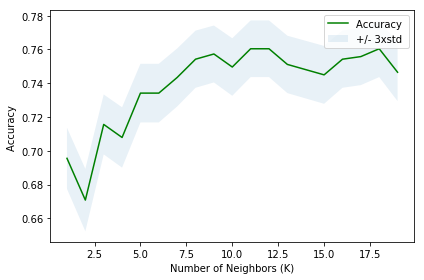

The best accuracy was  0.7604327666151468 with value of k= 11


In [181]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('Accuracyies for 20 values ok K: ',mean_acc)


#VIsualization of the accuracy for all the K value
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#Printing the best K value
print( "The best accuracy was ", mean_acc.max(), "with value of k=", mean_acc.argmax()+1)

### (a) Confusion Matrix of K-NN

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [148]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                precision    recall  f1-score   support

 2000 to 10000       0.68      0.59      0.63       236
less than 2000       0.82      0.88      0.85       250
    over 10000       0.71      0.76      0.73       161

     micro avg       0.75      0.75      0.75       647
     macro avg       0.74      0.74      0.74       647
  weighted avg       0.74      0.75      0.74       647

Confusion matrix, without normalization
[[221  28   1]
 [ 46 140  50]
 [  1  38 122]]


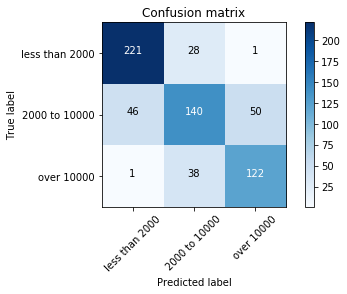

In [149]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=["less than 2000", "2000 to 10000", "over 10000"])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["less than 2000", "2000 to 10000", "over 10000"],normalize= False,  title='Confusion matrix')

### (b) Accuracies of K-NN

In [150]:
print("jaccard_similarity_score for KNN: %.2f" %jaccard_similarity_score(y_test, yhat))
print("f1_score for KNN: %.2f" %f1_score(y_test, yhat,average='weighted'))
print("LogLoss for KNN: %.2f" % log_loss(y_test, neigh.predict_proba(x_test)))

jaccard_similarity_score for KNN: 0.75
f1_score for KNN: 0.74
LogLoss for KNN: 0.85


## (ii) Decission Trees

In [151]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy")
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
# Prediction
yhat=drugTree.predict(x_test)
yhat[0:5]

array(['2000 to 10000', '2000 to 10000', '2000 to 10000', '2000 to 10000',
       '2000 to 10000'], dtype=object)

### (a) Confusion Matrix of Decission Trees

                precision    recall  f1-score   support

 2000 to 10000       0.61      0.58      0.60       236
less than 2000       0.85      0.86      0.86       250
    over 10000       0.61      0.63      0.62       161

     micro avg       0.70      0.70      0.70       647
     macro avg       0.69      0.69      0.69       647
  weighted avg       0.70      0.70      0.70       647

Confusion matrix, without normalization
[[216  31   3]
 [ 37 138  61]
 [  1  58 102]]


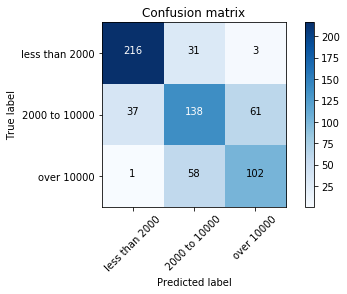

In [153]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=["less than 2000", "2000 to 10000", "over 10000"])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["less than 2000", "2000 to 10000", "over 10000"],normalize= False,  title='Confusion matrix')

### (b) Accuracies of Decission Trees

In [154]:
print("jaccard_similarity_score for Decission Trees: %.2f" %jaccard_similarity_score(y_test, yhat))
print("f1_score for Decission Trees: %.2f" %f1_score(y_test, yhat,average='weighted'))
print("LogLoss for Decission Trees: %.2f" % log_loss(y_test, drugTree.predict_proba(x_test)))

jaccard_similarity_score for Decission Trees: 0.70
f1_score for Decission Trees: 0.70
LogLoss for Decission Trees: 10.15


## (iii) Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [156]:
# Prediction
yhat=LR.predict(x_test)
yhat[0:5]

array(['2000 to 10000', 'less than 2000', 'over 10000', '2000 to 10000',
       '2000 to 10000'], dtype=object)

### (a) Confusion Matrix of Logistic Regression

                precision    recall  f1-score   support

 2000 to 10000       0.74      0.46      0.57       236
less than 2000       0.78      0.94      0.85       250
    over 10000       0.68      0.85      0.75       161

     micro avg       0.74      0.74      0.74       647
     macro avg       0.73      0.75      0.72       647
  weighted avg       0.74      0.74      0.72       647

Confusion matrix, without normalization
[[234  16   0]
 [ 63 108  65]
 [  2  22 137]]


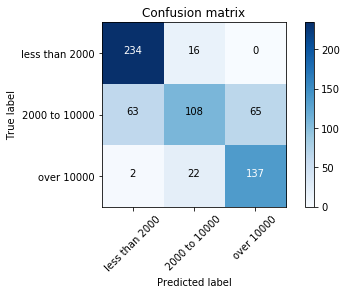

In [157]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=["less than 2000", "2000 to 10000", "over 10000"])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["less than 2000", "2000 to 10000", "over 10000"],normalize= False,  title='Confusion matrix')

### (b) Accuracies of Logistic Regression

In [158]:
print("jaccard_similarity_score for Logistic Regression: %.2f" %jaccard_similarity_score(y_test, yhat))
print("f1_score for Logistic Regression: %.2f" %f1_score(y_test, yhat,average='weighted'))
print("LogLoss for Logistic Regression: %.2f" % log_loss(y_test, LR.predict_proba(x_test)))

jaccard_similarity_score for Logistic Regression: 0.74
f1_score for Logistic Regression: 0.72
LogLoss for Logistic Regression: 0.68


## (iv) Support Vector Machine (SVM)

In [159]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', probability= True)
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [160]:
# Prediction
yhat=clf.predict(x_test)
yhat[0:5]

array(['2000 to 10000', '2000 to 10000', 'over 10000', '2000 to 10000',
       '2000 to 10000'], dtype=object)

### (a) Confusion Matrix of SVM

                precision    recall  f1-score   support

 2000 to 10000       0.69      0.60      0.64       236
less than 2000       0.85      0.87      0.86       250
    over 10000       0.69      0.81      0.74       161

     micro avg       0.75      0.75      0.75       647
     macro avg       0.74      0.76      0.75       647
  weighted avg       0.75      0.75      0.75       647

Confusion matrix, without normalization
[[217  33   0]
 [ 36 141  59]
 [  1  30 130]]


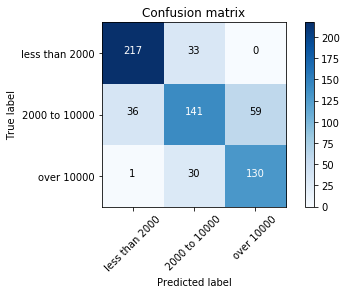

In [161]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=["less than 2000", "2000 to 10000", "over 10000"])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["less than 2000", "2000 to 10000", "over 10000"],normalize= False,  title='Confusion matrix')

### (b) Accuracies of SVM

In [162]:
print("jaccard_similarity_score for SVM: %.2f" %jaccard_similarity_score(y_test, yhat))
print("f1_score for SVM: %.2f" %f1_score(y_test, yhat,average='weighted'))
print("LogLoss for SVM: %.2f" % log_loss(y_test, clf.predict_proba(x_test)))

jaccard_similarity_score for SVM: 0.75
f1_score for SVM: 0.75
LogLoss for SVM: 0.53


# 9. Result of Traditional ML techniques:

## (i) The best classical machine learning classifier is SVM with 75% accuracy

# 10. Applying Neural Network

## (i) Data Preperation

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [164]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## (ii) Building the Neural Network

In [165]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [166]:
model = Sequential()

In [167]:
#input Layer
model.add(Dense(2585, activation='relu', input_dim=7))

#Specifying the number of neuron in hidden/ Dense Layer and type of activation function
model.add(Dense(2585,activation= 'relu')) 

# Output Layer
model.add(Dense(3,activation= 'softmax')) 

In [168]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2585)              20680     
_________________________________________________________________
dense_11 (Dense)             (None, 2585)              6684810   
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 7758      
Total params: 6,713,248
Trainable params: 6,713,248
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy']) 

In [176]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=15, batch_size=32, verbose=0)
#model.fit(x_train, y_train, epochs = 20, batch_size=32) #epochs means the iteration

In [177]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


# 11. Model Evaluatuion for Neural Network

### (i) Accurtacies: F-test score:

In [178]:
model.evaluate(x_test, y_test)

647/647 [==============================] - 0s 443us/step


[0.5409502278339734, 0.7542503865830128]

In [179]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f"Test Score: {loss:.3%}")
print(f"Test Accuracy: {accuracy:.3%}")

Test Score: 54.095%
Test Accuracy: 75.425%


### (ii) Accuracy & loss graph

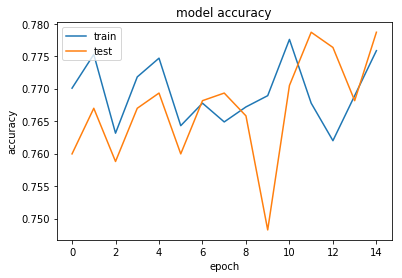

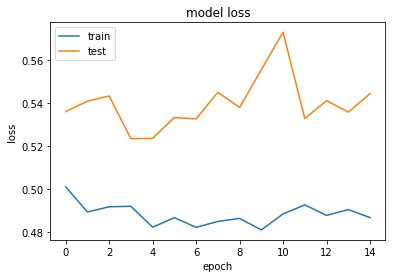

In [180]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()